# Plotting intensity profile of SIM Images With Localization

## Getting Started 

-----


In [1]:
########################################
# Import necessary libraries
import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python36/Lib/site-packages")

from PIL import Image
import numpy as np
import numpy
import matplotlib.pyplot as plt
import os
import math
import scipy.ndimage
from skimage import io
from tifffile import imsave
import matplotlib.patches as patches
from skimage import exposure

from skimage.metrics import structural_similarity

from skimage.measure import profile_line
from skimage.io import imread
from sklearn.metrics import mean_squared_error
from skimage.exposure import match_histograms

In [2]:
# Defining performance metrics functions

def psnr(img1, img2):
    #img1 = (img1/np.amax(img1))*255
    #img2 = (img2/np.amax(img2))*255
    mse = np.mean( (img1 - img2) ** 2 )

    # if the images are identical, avoid indeterminate form
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def nrmse(img_gt, img2, type="sd"):
    mse = np.mean( (img_gt - img2) ** 2 )
    rmse = math.sqrt(mse)
    if type == "sd":
        nrmse = rmse/np.std(img_gt)
    if type == "mean":
        nrmse = rmse/np.mean(img_gt)
    if type == "maxmin":
        nrmse = rmse/(np.max(img_gt) - np.min(img_gt))
    if type == "iq":
        nrmse = rmse/ (np.quantile(img_gt, 0.75) - np.quantile(img_gt, 0.25))
    if type not in ["mean", "sd", "maxmin", "iq"]:
        print("Wrong type!")
    return nrmse

def ssim(img1, img2, data_range = None):

   #img2 = (img2/img2.max()) * img1.max()
   if data_range is None:
       score = structural_similarity(img1, img2)
   else:
       score = structural_similarity(img1, img2, data_range = data_range)
   return score

In [3]:
########################################
# Bring data into phyton notebook

# White line distance from the left side
x_movt = 590 #840
y_start = 0
#Data from : https://github.com/bereketeshete/PySIM/blob/HPC/README.md
Lateral_slice_number = 10  # z value
Axial_slice_number = 58


wide_field_path = "D:\Bereket\DeepLearning - 3D\Data\Data_2D_3\wide-field\WF_test_scaled_2x.tif"
wide_field = io.imread(wide_field_path) # read image from a path
wide_field = wide_field/np.max(wide_field) #normalize
wide_field_lateral = wide_field[Lateral_slice_number] # pick the focal plane
wide_field_axial = wide_field[0:64,Axial_slice_number,:] # pick the xz plane
wide_field_axial_cropped = wide_field[0:64,Axial_slice_number,x_movt-100:x_movt+100] # crop the axial, crop_axial = 200:400


processing_2D_path = "D:/Bereket/DeepLearning - 3D/Data/Data_2D_3/super-resolution/test_prediction_by_luhong_trained_model.tif"
#processing_2D_path = "D:/Bereket/DeepLearning - 3D/Data/Data_2D_2/super-resolution/test_prediction_3R_epoch_100_batch_1_lr_luhong.tif"
#processing_2D_path = "D:/Bereket/DeepLearning - 3D/Data/Data_2D_3/super-resolution/test_prediction_original_epoch_500_batch_1_lr_luhong.tif"
processing_2D_img = io.imread(processing_2D_path)
processing_2D_img = processing_2D_img/np.max(processing_2D_img) 
processing_2D_img_lateral = processing_2D_img[Lateral_slice_number]
processing_2D_img_axial = processing_2D_img[:,Axial_slice_number,:]
processing_2D_img_axial_cropped = processing_2D_img[:,Axial_slice_number,x_movt-100:x_movt+100]


processing_2D_convs_original_path = "D:/Bereket/DeepLearning - 3D/Data/Data_2D_3/super-resolution/test_prediction_original_epoch_500_batch_1_lr_luhong.tif"
processing_2D_convs_original = io.imread(processing_2D_convs_original_path)
processing_2D_convs_original = processing_2D_convs_original/np.max(processing_2D_convs_original) 
processing_2D_convs_original_lateral = processing_2D_convs_original[Lateral_slice_number]
processing_2D_convs_original_axial = processing_2D_convs_original[:,Axial_slice_number,:]
processing_2D_convs_original_axial_cropped = processing_2D_convs_original[:,Axial_slice_number,x_movt-100:x_movt+100]


gt_path = "D:/Bereket/DeepLearning - 3D/Workspace/Final Outputs/testing_gt.tif"
gt_img = io.imread(gt_path)
gt_img = gt_img/np.max(gt_img)
gt_img_lateral = gt_img[Lateral_slice_number]
gt_img_axial = gt_img[0:64,Axial_slice_number,:] 
gt_img_axial_cropped = gt_img[0:64,Axial_slice_number,x_movt-100:x_movt+100] 


DL_3D_path = "D:/Bereket/DeepLearning - 3D/Data/Data_3D_2/super-resolution/test_prediction_epoch_100_batch_1_lr_0.001.tif"
DL_3D_100 = io.imread(DL_3D_path)
DL_3D_100 = DL_3D_100/np.max(DL_3D_100)
DL_3D_100_lateral = DL_3D_100[Lateral_slice_number]
DL_3D_100_axial = DL_3D_100[:,Axial_slice_number,:]
DL_3D_100_axial_cropped = DL_3D_100[:,Axial_slice_number,x_movt-100:x_movt+100]



# print image sizes 
print('wide_field lateral size is: ', wide_field_lateral.shape)
print('DL 3D 100 lateral size is: ', DL_3D_100_lateral.shape)
print('Ground truth 200 lateral size is: ', gt_img_lateral.shape)
print('2D_processing_img lateral size is: ', processing_2D_img.shape)
print('2D_convs_original lateral size is: ', processing_2D_convs_original.shape)

print('\n')

print('wide_field axial size is: ', wide_field_axial.shape)
print('DL 3D 100 axial size is: ', DL_3D_100_axial.shape)
print('Ground truth 100 axial size is: ', gt_img_axial.shape)
print('2D_processing_img axial size is: ', processing_2D_img_axial.shape)
print('2D_convs axial size is: ', processing_2D_img_axial.shape)

print('\n')

print('wide_field axial cropped size is: ', wide_field_axial_cropped.shape)
print('DL 3D 100 axial cropped size is: ', DL_3D_100_axial_cropped.shape)
print('Ground truth 100 axial cropped size is: ', gt_img_axial_cropped.shape)
print('2D_processing_img axial cropped size is: ', processing_2D_img_axial_cropped.shape)
print('2D_convs axial cropped size is: ', processing_2D_img_axial_cropped.shape)

wide_field lateral size is:  (256, 1024)
DL 3D 100 lateral size is:  (256, 1024)
Ground truth 200 lateral size is:  (256, 1024)
2D_processing_img lateral size is:  (64, 256, 1024)
2D_convs_original lateral size is:  (64, 256, 1024)


wide_field axial size is:  (64, 1024)
DL 3D 100 axial size is:  (64, 1024)
Ground truth 100 axial size is:  (64, 1024)
2D_processing_img axial size is:  (64, 1024)
2D_convs axial size is:  (64, 1024)


wide_field axial cropped size is:  (64, 200)
DL 3D 100 axial cropped size is:  (64, 200)
Ground truth 100 axial cropped size is:  (64, 200)
2D_processing_img axial cropped size is:  (64, 200)
2D_convs axial cropped size is:  (64, 200)


In [4]:
# Function: finds cumulative sum of a numpy array, list
def cumsum(h):
  
    return [sum(h[:i+1]) for i in range(len(h))]

def hist_eq(im):
    #calculate Histogram
    h = make_norm_histogram(im)
    cdf = np.array(cumsum(h)) #cumulative distribution function
    
    # We can now use the normalized cumulative sum to modify the intensity values of our original image.
    sk = np.uint8(255 * cdf) #finding transfer function values
    s1, s2 = im.shape
    Y = np.zeros_like(im)
    # applying transfered values for each pixels
    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = sk[im[i, j]]
    H = make_norm_histogram(Y)
    #return transformed image, original and new histogram, 
    # and transform function
    return Y, h, H, sk

def local_histeq(img, kernel):
    M, N = img.shape
    x, y = kernel
    eq_img = np.copy(img)
    for i in range(0,M-x,x):
        for j in range(0,N-y,y):
            img_eq = np.copy(eq_img[i:i+x, j:j+y])
            
            _, eq_img[i:i+x, j:j+y], _ = hist_eq(img_eq)
    eq_img = scale_img(eq_img)      
    return eq_img


def make_norm_histogram(img):   
    
    histogram = np.zeros((256,), dtype=int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram[img[i,j]] += 1 #index the bins and populate the bucket based on intensity value of a pixel
    return histogram/(img.shape[0]*img.shape[1])

def plot_hist(hist):
    plt.figure(figsize=(8,6))
    plt.bar(list(range(0,256)), hist)
    plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

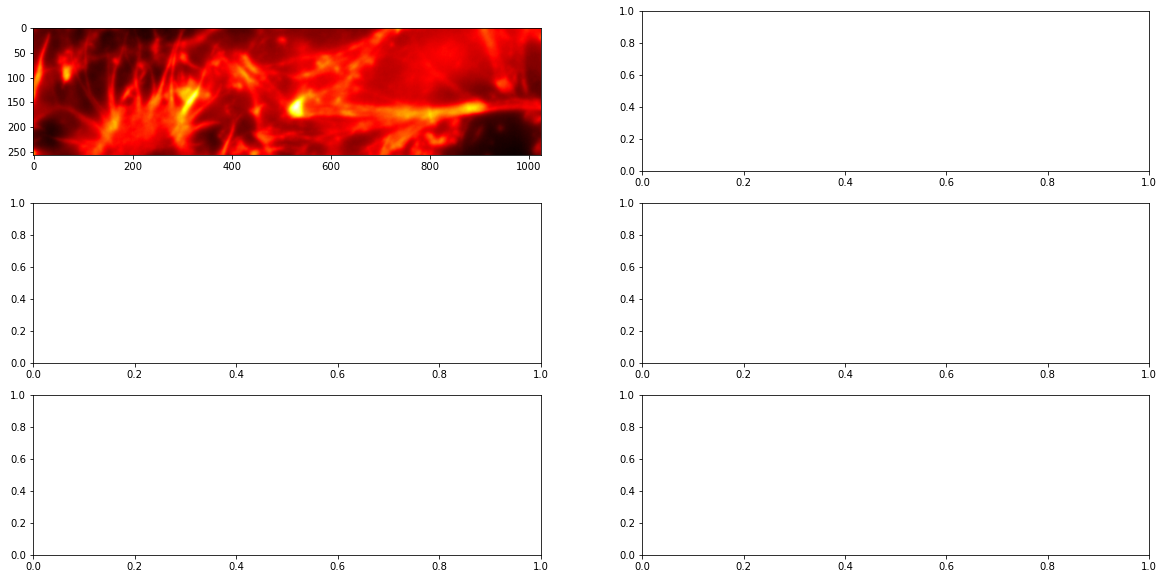

In [8]:
length = 50

# profile line
start_2 = (wide_field_lateral.shape[0]//2,150)
end_2 = (wide_field_lateral.shape[0]//2, 150+length)


profile = profile_line(wide_field_lateral, start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_2 = profile_line(processing_2D_img_lateral, start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_3 = profile_line(gt_img_lateral, start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_4 = profile_line(DL_3D_100_lateral, start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_5 = profile_line(processing_2D_convs_original_lateral, start_2, end_2, linewidth=1, mode='constant') #Take the profile line

columns = 3
rows = 2

fig, ax = plt.subplots(columns, rows, figsize=(20, 10)) # setup the figures

ax[0,0].imshow(wide_field_lateral, cmap = 'hot') #Show the film at the top
ax[0,0].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2) #Plot a red line across the film
ax[0,1].imshow(processing_2D_img_lateral, cmap = 'hot') #Show the film at the top
ax[0,1].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]],'w-', lw=2)


ax[1,0].imshow(gt_img_lateral, cmap = 'hot') #Show the film at the top
ax[1,0].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2)
ax[1,1].imshow(DL_3D_100_lateral, cmap = 'hot') #Show the film at the top
ax[1,1].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2)


ax[2,1].imshow(processing_2D_convs_original_lateral, cmap = 'hot') #Show the film at the top
ax[2,1].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]],'w-', lw=2)


ax[0,0].set_title('Wide-field')
ax[0,1].set_title('DL-SIM 2D (2D-convolution layers - Luhong pre-trained)')
ax[1,0].set_title('Ground truth')
ax[1,1].set_title('DL-SIM 3D (3D-convolution layers)')
ax[2,1].set_title('DL-SIM 2D (2D-convolution layers)')


fig_2, ax_2 = plt.subplots(1, 1, figsize=(15, 5)) #Create the figures


#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

# ax_2.plot(x1,profile)
# ax_2.plot(x1,profile_2, 'g-', marker= '^')
# ax_2.plot(x1,profile_3, 'k-', marker='o')
# ax_2.plot(x1,profile_4,  marker='s')

ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'g-')
ax_2.plot(x1,profile_3, 'k-')
ax_2.plot(x1,profile_4, 'y-')
ax_2.plot(x1,profile_5)

ax_2.grid()

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Wide-Field', 'Deep-Learning 2D', 'Ground truth','Deep-Learning 3D'],  fontsize=16, loc='upper left')

In [10]:
io.imsave('saved_images/wide_field_lateral.tiff',wide_field_lateral)
io.imsave('saved_images/gt_img_lateral.tiff',gt_img_lateral)

In [112]:
original_2D_img = np.multiply(processing_2D_convs_original_lateral,255).astype(int)
img_3D = np.multiply(DL_3D_100_lateral,255).astype(int)
ground_truth_img = np.multiply(gt_img_lateral,255).astype(int)

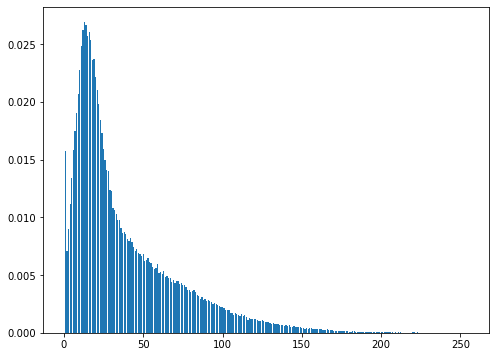

In [92]:
hist_3D = make_norm_histogram(histogram_3D)
plot_hist(hist_3D)


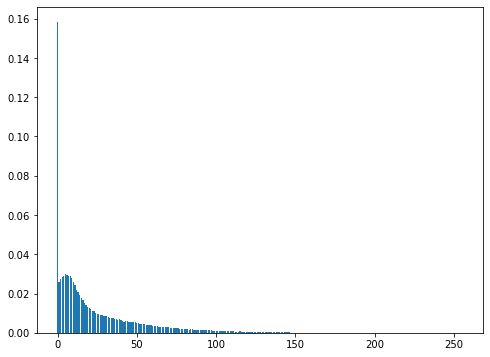

In [100]:
hist_ground_truth = make_norm_histogram(ground_truth_img)
plot_hist(hist_ground_truth)

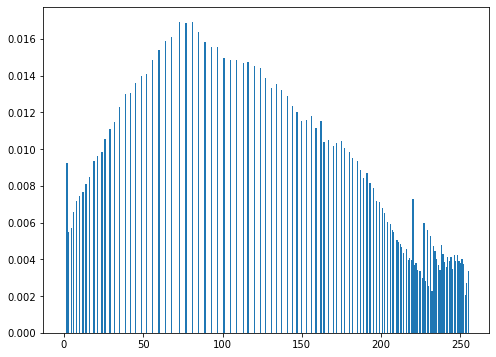

In [117]:
# local_hist_2D = hist_eq(original_2D_img)
# plt.imshow(local_hist_2D)

eq_img, h, new_h, sk = hist_eq(original_2D_img)
plot_hist(new_h)

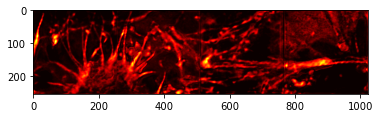

In [106]:
matched_2D = match_histograms(original_2D_img, ground_truth_img, multichannel=False,)
matched_3D = match_histograms(img_3D, ground_truth_img, multichannel=False,)


plt.imshow(matched, cmap = 'hot')

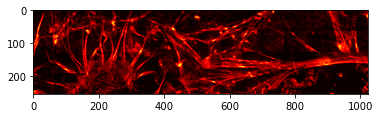

In [108]:
plt.imshow(matched_3D, cmap = 'hot')

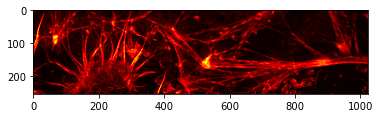

In [121]:
plt.imshow(gt_img_lateral, cmap = 'hot') #Show the film at the top

In [45]:
pnsr_2D = psnr(processing_2D_img_lateral, gt_img_lateral)
nrmse_2D = nrmse(processing_2D_img_lateral, gt_img_lateral)
ssim_2D = ssim(processing_2D_img_lateral, gt_img_lateral.astype('float64'))

psnr_3D = psnr(DL_3D_100_lateral, gt_img_lateral)
nrmse_3D = nrmse(DL_3D_100_lateral, gt_img_lateral)
ssim_3D = ssim(DL_3D_100_lateral, gt_img_lateral.astype('float64'))

In [46]:
print(pnsr_2D)
print(nrmse_2D)
print(ssim_2D)

68.38953639640056
2.364603764671146
0.47401826019090487


In [47]:
print(psnr_3D)
print(nrmse_3D)
print(ssim_3D)

68.90786483869847
0.6943595567747999
0.637768754108767


## Axial Intensity Profile

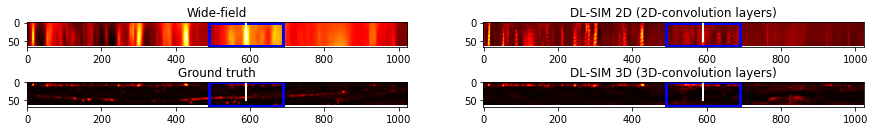

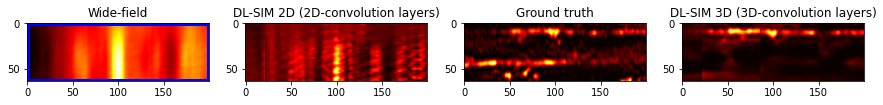

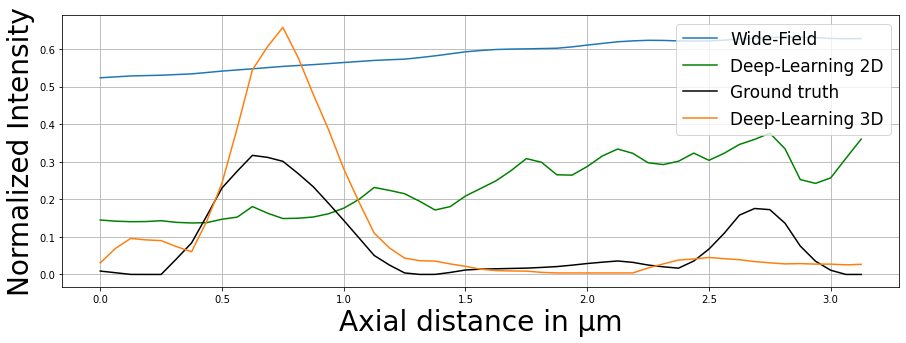

In [75]:
length = 50

#x_movt = 300
y_start = 0

start_2 = (y_start,x_movt)
end_2 = (y_start+length, x_movt)

rect = patches.Rectangle((x_movt-100, 0), 200, 64, linewidth=3, edgecolor='b', facecolor='none')
rect_2 = patches.Rectangle((x_movt-100, 0), 200, 64, linewidth=3, edgecolor='b', facecolor='none')
rect_3 = patches.Rectangle((x_movt-100, 0), 200, 64, linewidth=3, edgecolor='b', facecolor='none')
rect_4 = patches.Rectangle((x_movt-100, 0), 200, 64, linewidth=3, edgecolor='b', facecolor='none')

#image = imread('....tif') #Read the images

profile = profile_line(wide_field_axial, start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_2 = profile_line(processing_2D_img_axial, start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_3 = profile_line(gt_img_axial, start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_4 = profile_line(DL_3D_100_axial, start_2, end_2, linewidth=1, mode='constant') #Take the profile line

fig, ax = plt.subplots(2, 2, figsize=(15, 2)) #Create the figures

ax[0,0].imshow(wide_field_axial, cmap = 'hot') # Show the film at the top
ax[0,0].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2) # plot a white line across the film
ax[0,0].add_patch(rect) # 
ax[0,1].imshow(processing_2D_img_axial, cmap = 'hot') 
ax[0,1].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]],'w-', lw=2)
ax[0,1].add_patch(rect_2)


ax[1,0].imshow(gt_img_axial, cmap = 'hot') 
ax[1,0].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2)
ax[1,0].add_patch(rect_3)
ax[1,1].imshow(DL_3D_100_axial, cmap = 'hot') 
ax[1,1].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2)
ax[1,1].add_patch(rect_4)

#ax[3].plot(profile)
#ax[3].plot(profile_2)
#ax[3].plot(profile_3)

#ax[3].grid()
ax[0,0].set_title('Wide-field')
ax[0,1].set_title('DL-SIM 2D (2D-convolution layers)')
ax[1,0].set_title('Ground truth')
ax[1,1].set_title('DL-SIM 3D (3D-convolution layers)')
#ax[3].set_title('Intensity profile')

#######################
# Cropped plot 

fig_3, ax_3 = plt.subplots(1, 4, figsize=(15, 5)) 

ax_3[0].imshow(wide_field_axial_cropped, cmap = 'hot') 
ax_3[1].imshow(processing_2D_img_axial_cropped, cmap = 'hot') 
ax_3[2].imshow(gt_img_axial_cropped, cmap = 'hot') 
ax_3[3].imshow(DL_3D_100_axial_cropped, cmap = 'hot')

rect_crop_wf = patches.Rectangle((0, 0), 200, 64, linewidth=5, edgecolor='b', facecolor='none')
ax_3[0].add_patch(rect_crop_wf)

ax_3[0].set_title('Wide-field')
ax_3[1].set_title('DL-SIM 2D (2D-convolution layers)')
ax_3[2].set_title('Ground truth')
ax_3[3].set_title('DL-SIM 3D (3D-convolution layers)')

#####################
# Intensity plot

fig_2, ax_2 = plt.subplots(1, 1, figsize=(15, 5)) #Create the figures

#*(40.96/1024)

#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96/1024)
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.125/2)


ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'g-')
ax_2.plot(x1,profile_3, 'k-')
ax_2.plot(x1,profile_4)
ax_2.grid()
ax_2.set_xlabel("Axial distance in μm", fontsize=28)
ax_2.set_ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Wide-Field', 'Deep-Learning 2D', 'Ground truth', 'Deep-Learning 3D'], fontsize=17, loc='upper right')


In [51]:
pnsr_2D = psnr(processing_2D_img_axial, gt_img_axial)
nrmse_2D = nrmse(processing_2D_img_axial, gt_img_axial)
ssim_2D = ssim(processing_2D_img_axial, gt_img_axial.astype('float64'))

psnr_3D = psnr(DL_3D_100_axial, gt_img_axial)
nrmse_3D = nrmse(DL_3D_100_axial, gt_img_axial)
ssim_3D = ssim(DL_3D_100_axial, gt_img_axial.astype('float64'))

In [52]:
print(pnsr_2D)
print(nrmse_2D)
print(ssim_2D)

66.95642369768555
2.248234160364204
0.2834504814960117


In [53]:
print(psnr_3D)
print(nrmse_3D)
print(ssim_3D)

73.12309929665474
0.9185318644543388
0.6617787057630328


Reference

[1] https://pythonshowcase.com/question/image-profile-intensity

In [1]:
pip install jupyter_contrib_nbextensions

  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963415 sha256=0679a5b1a35685430fab95051f16d06b9b303a3e3b80fcff0afe38e63e0451ba
  Stored in directory: c:\users\cirl\appdata\local\pip\cache\wheels\f7\b5\78\f5b899dd8fc137fe0bfe26b382713f6d171c9eac2fb1fa091f
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465843 sha256=a04a6fedee4fe5907c0cf7276addb9afbe1c20b84fe040bbec7fc1b5754ebca5
  Stored in directory: c:\users\cirl\appdata\local\pip\cache\wheels\94\62\cd\233da8580d4e1228ab3fbede758ab1b97174bf9d9cea095049
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
Note: you may need to restart the kernel to use updated packages.


In [2]:
jupyter contrib nbextension install --user

SyntaxError: invalid syntax (Temp/ipykernel_9488/1639211862.py, line 1)